In [16]:
import cv2
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt

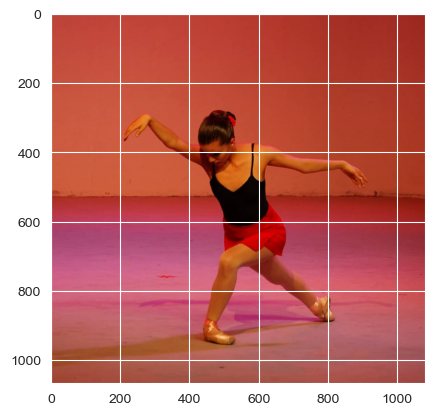

In [17]:
img = cv2.imread('Screenshot_20181218-004837.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [18]:
img.shape

(1067, 1080, 3)

In [19]:
#Vectorize the image
nr, nc, nch = img.shape
img = np.reshape(img, (nr*nc, nch))
print('Image shape after vectorization: ', img.shape)


Image shape after vectorization:  (1152360, 3)


In [20]:
#Kmeans
k = 4
model = KMeans(n_clusters=k)
model.fit(img)
g = model.predict(img)

In [21]:
print(g)
print(np.unique(g))

[0 0 0 ... 3 3 3]
[0 1 2 3]


In [22]:
centroids = model.cluster_centers_.astype(np.uint8)
print(centroids)

[[191  80  60]
 [190  90 109]
 [ 36   7   3]
 [167  52  36]]


In [23]:
Xmeans = np.zeros_like(img)
for i in range(k):
    Xmeans[g==i] = centroids[i]

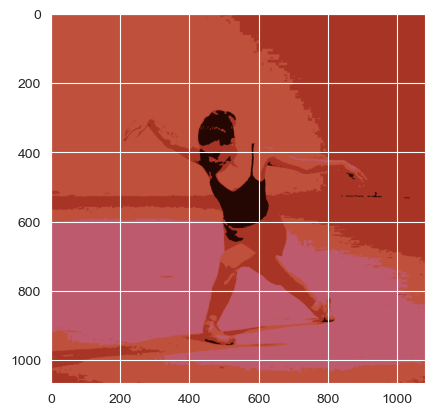

In [24]:
# Regresar a imagen
means = np.reshape(Xmeans, (nr, nc, 3))
plt.imshow(means)
plt.show()